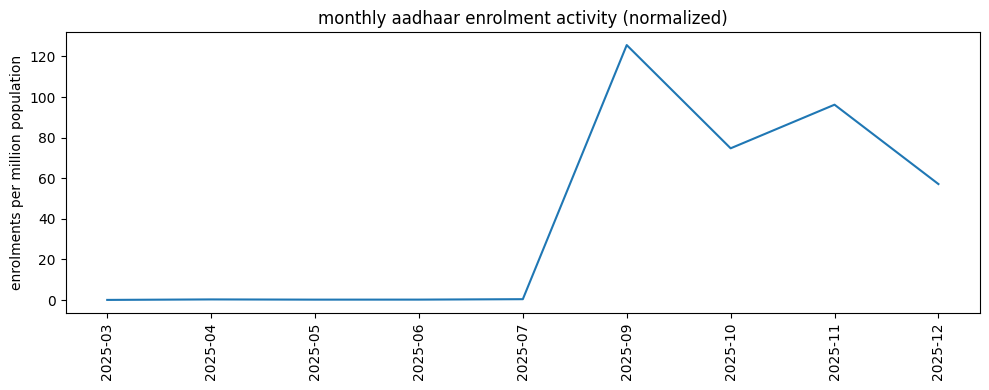

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# enrolments
enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolment_df["date"]=pd.to_datetime(enrolment_df["date"])
enrolment_df["month"]=enrolment_df["date"].dt.to_period("M").astype(str)

monthly_enrol=enrolment_df.groupby("month").size().reset_index(name="enrolments")

# population (national)
population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population["population"]=population["Population 2025"].astype(str).str.replace(",","").astype(int)
total_population=population["population"].sum()

monthly_enrol["enrolments_per_million"]=(monthly_enrol["enrolments"]/total_population)*1_000_000

plt.figure(figsize=(10,4))
plt.plot(monthly_enrol["month"],monthly_enrol["enrolments_per_million"])
plt.xticks(rotation=90)
plt.ylabel("enrolments per million population")
plt.title("monthly aadhaar enrolment activity (normalized)")
plt.tight_layout()
plt.show()
